(-0.5, 356.5, 199.5, -0.5)

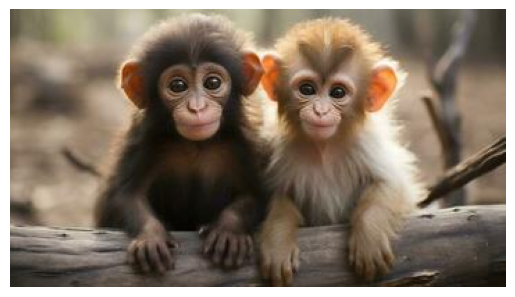

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("/content/monkey.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")

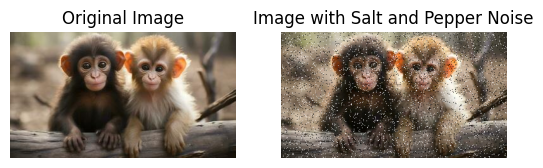

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def add_salt_pepper_noise(image, prob):
    output = np.copy(image)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
    return output

# Add salt and pepper noise to the image
prob = 0.04
noisy_img = add_salt_pepper_noise(image, prob)

# Display the original and noisy images side by side
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img)
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

plt.show()

<ipython-input-25-0f15c68a8778>:101: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256], alpha=0.7)
<ipython-input-25-0f15c68a8778>:105: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(noisy_img_uniform.ravel(), 256, [0, 256], alpha=0.7)
<ipython-input-25-0f15c68a8778>:109: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(noisy_img_gaussian.ravel(), 256, [0, 256], alpha=0.7)
<ipython-input-25-0f15c68a8778>:113: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(

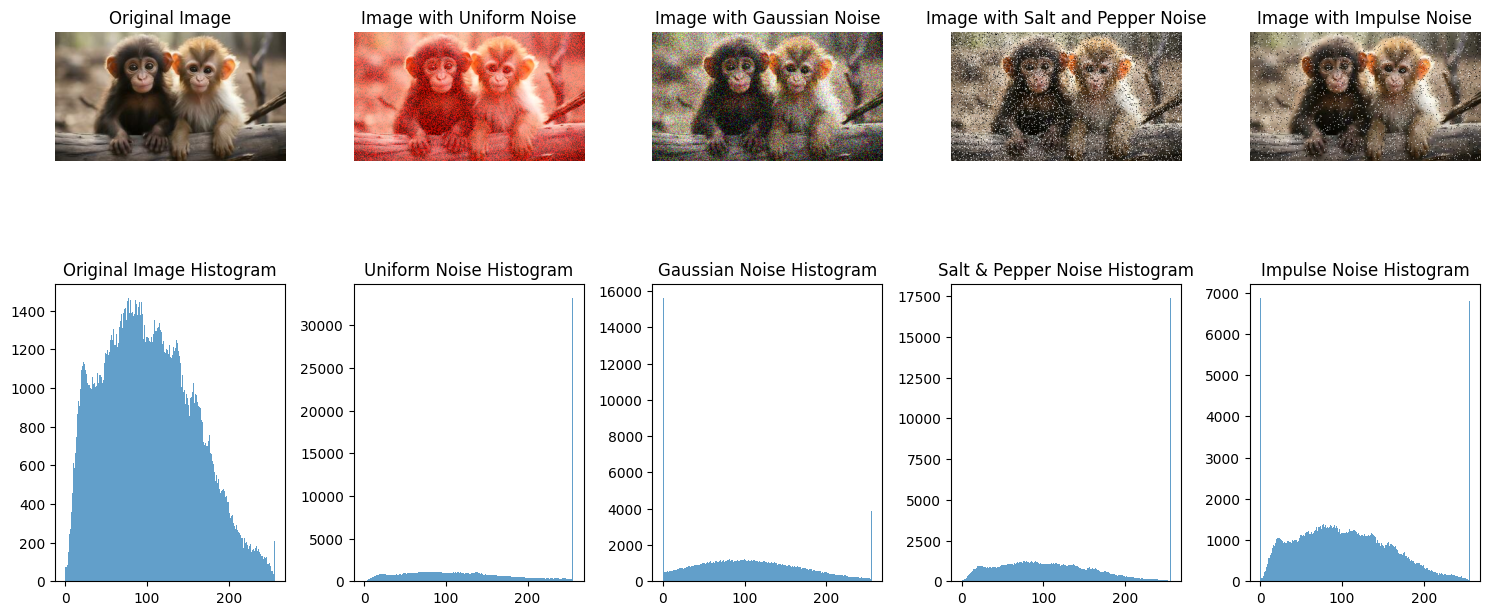

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and convert the image
image = cv2.imread("/content/monkey.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Add uniform noise
def uninoise(im):
    gamma = 1
    # Create an array with the same shape as the image for uniform noise
    un = np.zeros(im.shape).astype(np.uint8)
    # Generate uniform noise within the range [0, 256) for each channel
    cv2.randu(un, 0, 256)
    # Apply gamma correction and add noise to the image
    uni = (un * gamma).astype(np.uint8)
    u = cv2.add(im, uni)  # Now 'im' and 'uni' have the same shape
    return u

noisy_img_uniform = uninoise(image)
# Add Gaussian noise
mean = 0
sigma = 45  # Standard deviation (intensity of noise)
gaussian_noise = np.random.normal(mean, sigma, image.shape)

# Adding Gaussian noise and clipping values
noisy_img_gaussian = np.uint8(np.clip(image + gaussian_noise, 0, 255))

# Function to add impulse noise
def impulse(im):
    im_copy = np.copy(im)  # Work on a copy to prevent modifying the original image
    r, c, _ = im.shape  # Get image dimensions
    n = np.random.randint(200, 3000)  # Number of noisy pixels
    for _ in range(n):
        xc = np.random.randint(0, r-1)
        yc = np.random.randint(0, c-1)
        im_copy[xc, yc] = 255  # White pixel
    for _ in range(n):
        xc = np.random.randint(0, r-1)
        yc = np.random.randint(0, c-1)
        im_copy[xc, yc] = 0  # Black pixel
    return im_copy

# Apply impulse noise
impulse_img = impulse(image)

# Function to add salt & pepper noise
def add_salt_pepper_noise(image, prob):
    output = np.copy(image)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i, j] = 0  # Pepper (black)
            elif rdn > thres:
                output[i, j] = 255  # Salt (white)
    return output

# Apply salt & pepper noise
prob = 0.08
spn_img = add_salt_pepper_noise(image, prob)

# Display images and histograms
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(3, 5, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Image with Uniform Noise
plt.subplot(3, 5, 2)
plt.imshow(noisy_img_uniform)
plt.title('Image with Uniform Noise')
plt.axis('off')

# Image with Gaussian Noise
plt.subplot(3, 5, 3)
plt.imshow(noisy_img_gaussian)
plt.title('Image with Gaussian Noise')
plt.axis('off')

# Image with Salt and Pepper Noise
plt.subplot(3, 5, 4)
plt.imshow(spn_img)
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

# Image with Impulse Noise
plt.subplot(3, 5, 5)
plt.imshow(impulse_img)
plt.title('Image with Impulse Noise')
plt.axis('off')

# Histograms
plt.subplot(3, 5, 6)
plt.hist(image.ravel(), 256, [0, 256], alpha=0.7)
plt.title("Original Image Histogram")

plt.subplot(3, 5, 7)
plt.hist(noisy_img_uniform.ravel(), 256, [0, 256], alpha=0.7)
plt.title("Uniform Noise Histogram")

plt.subplot(3, 5, 8)
plt.hist(noisy_img_gaussian.ravel(), 256, [0, 256], alpha=0.7)
plt.title("Gaussian Noise Histogram")

plt.subplot(3, 5, 9)
plt.hist(spn_img.ravel(), 256, [0, 256], alpha=0.7)
plt.title("Salt & Pepper Noise Histogram")

plt.subplot(3, 5, 10)
plt.hist(impulse_img.ravel(), 256, [0, 256], alpha=0.7)
plt.title("Impulse Noise Histogram")

plt.tight_layout()
plt.show()


<ipython-input-32-4b657fd28333>:83: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(images[i][:, :, j].ravel(), 256, [0, 256], color=color, alpha=0.6)


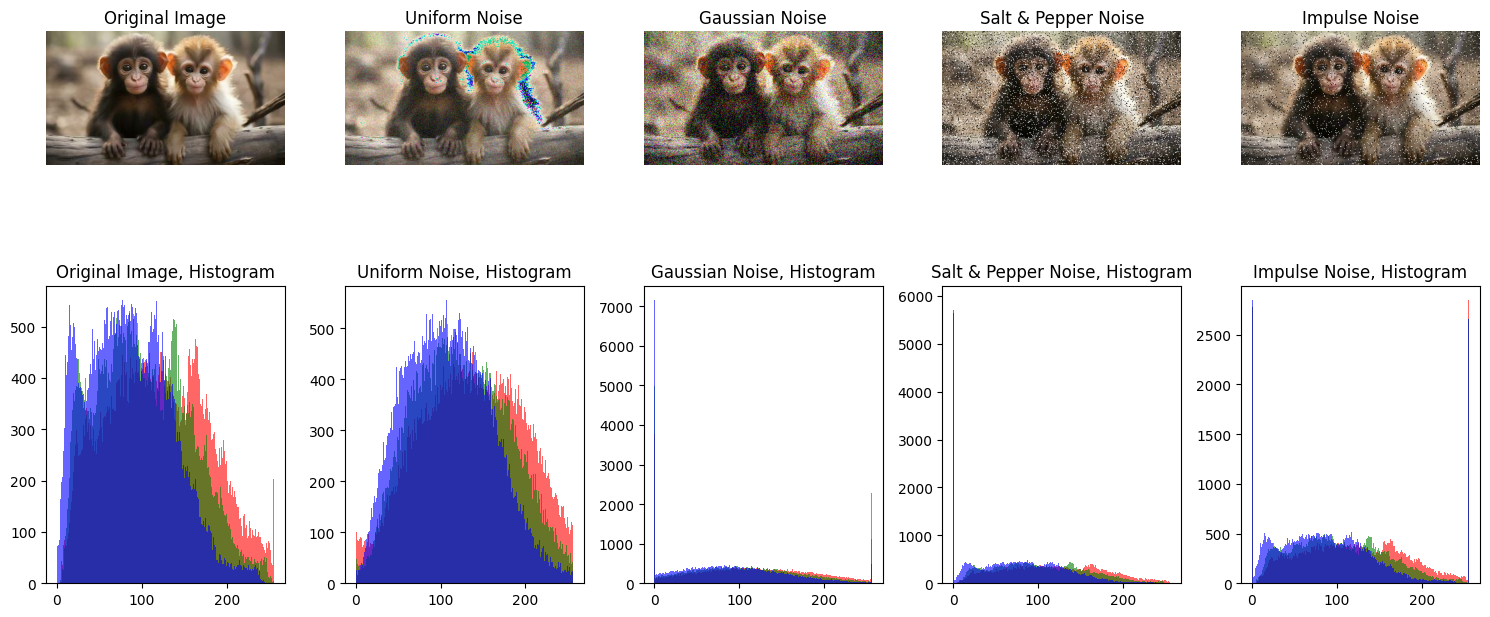

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and convert the image
image = cv2.imread("/content/monkey.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to add uniform noise
def uninoise(im):
    noise = np.random.uniform(0, 50, im.shape).astype(np.uint8)  # Range 0-50 for visible effect
    noisy_img = np.clip(im + noise, 0, 255)  # Prevent overflow
    return noisy_img

# Apply uniform noise
noisy_img_uniform = uninoise(image)

# Apply uniform noise
noisy_img_uniform = uninoise(image)

# Add Gaussian noise
mean = 0
sigma = 45  # Standard deviation (intensity of noise)
gaussian_noise = np.random.normal(mean, sigma, image.shape)

# Adding Gaussian noise and clipping values
noisy_img_gaussian = np.uint8(np.clip(image + gaussian_noise, 0, 255))

# Function to add impulse noise
def impulse(im):
    im_copy = np.copy(im)
    r, c, ch = im.shape  # Ensure color channels are considered
    n = np.random.randint(200, 3000)  # Number of noisy pixels
    for _ in range(n):
        xc = np.random.randint(0, r)
        yc = np.random.randint(0, c)
        im_copy[xc, yc] = [255, 255, 255]  # White pixel
    for _ in range(n):
        xc = np.random.randint(0, r)
        yc = np.random.randint(0, c)
        im_copy[xc, yc] = [0, 0, 0]  # Black pixel
    return im_copy

# Apply impulse noise
impulse_img = impulse(image)

# Function to add salt & pepper noise
def add_salt_pepper_noise(image, prob):
    output = np.copy(image)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i, j] = [0, 0, 0]  # Pepper (black)
            elif rdn > thres:
                output[i, j] = [255, 255, 255]  # Salt (white)
    return output

# Apply salt & pepper noise
prob = 0.08
spn_img = add_salt_pepper_noise(image, prob)

# Display images and histograms
plt.figure(figsize=(15, 10))

# Display original and noisy images
titles = ['Original Image', 'Uniform Noise', 'Gaussian Noise', 'Salt & Pepper Noise', 'Impulse Noise']
images = [image, noisy_img_uniform, noisy_img_gaussian, spn_img, impulse_img]

for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

# Display histograms for each channel (RGB)
colors = ['red', 'green', 'blue']
for i in range(5):
    plt.subplot(3, 5, i + 6)
    for j, color in enumerate(colors):
        plt.hist(images[i][:, :, j].ravel(), 256, [0, 256], color=color, alpha=0.6)
    plt.title(titles[i] + ', Histogram')
plt.tight_layout()
plt.show()


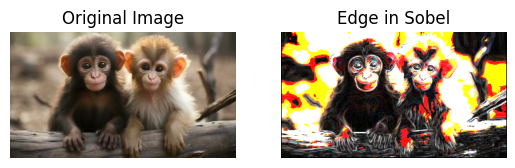

In [ ]:
kx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
ky = np.array([[-1, -2, -1],[ 0, 0, 0], [ 1, 2, 1]])
r, c,_ = image.shape
gx = np.zeros_like(image, dtype=np.float32)
gy = np.zeros_like(image, dtype=np.float32)
for i in range(1, r-1):
  for j in range(1, c-1):
    magx = 0
    for a in range(3):
     for b in range(3):
        xn = i + a - 1
        yn = j + b - 1
        magx += image[xn, yn] * kx[a, b]
        gx[i, j] = magx
for i in range(1, r-1):
     for j in range(1, c-1):
      magy = 0.0
      for a in range(3):
          for b in range(3):
            xn = i + a - 1
            yn = j + b - 1
            magy += image[xn, yn] * ky[a, b]
            gy[i, j] = magy
            m = np.sqrt(gx**2 + gy**2)
# Normalize and convert the magnitude image to uint8 for display
ma = np.uint8(np.clip(m, 0, 255))
plt.subplot(121)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='grey')
plt.subplot(122)
plt.title('Edge in Sobel')
plt.axis('off')
plt.imshow(ma, cmap='grey')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image
image = cv2.imread("/content/monkey.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to add uniform noise
def add_uniform_noise(im):
    noise = np.random.uniform(0, 50, im.shape).astype(np.uint8)
    return np.clip(im + noise, 0, 255)

# Function to add Gaussian noise
def add_gaussian_noise(im, mean=0, sigma=45):
    gaussian_noise = np.random.normal(mean, sigma, im.shape)
    return np.uint8(np.clip(im + gaussian_noise, 0, 255))

# Function to add impulse noise
def add_impulse_noise(im):
    im_copy = np.copy(im)
    r, c, _ = im.shape
    n = np.random.randint(200, 3000)
    for _ in range(n):
        xc, yc = np.random.randint(0, r), np.random.randint(0, c)
        im_copy[xc, yc] = [255, 255, 255]  # White pixel
    for _ in range(n):
        xc, yc = np.random.randint(0, r), np.random.randint(0, c)
        im_copy[xc, yc] = [0, 0, 0]  # Black pixel
    return im_copy

# Function to add salt & pepper noise
def add_salt_pepper_noise(im, prob=0.08):
    output = np.copy(im)
    thres = 1 - prob
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i, j] = [0, 0, 0]  # Black pixel (pepper)
            elif rdn > thres:
                output[i, j] = [255, 255, 255]  # White pixel (salt)
    return output

# Apply noise to images
noisy_img_uniform = add_uniform_noise(image)
noisy_img_gaussian = add_gaussian_noise(image)
noisy_img_spn = add_salt_pepper_noise(image)
noisy_img_impulse = add_impulse_noise(image)

# Filters to remove noise
def apply_gaussian_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def apply_mean_filter(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))

def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

# Adaptive Median Filter for Salt & Pepper Noise
def adaptive_median_filter(image, max_kernel_size=7):
    """
    Adaptive median filter that adjusts kernel size dynamically for salt & pepper noise.
    """
    padded_img = cv2.copyMakeBorder(image, max_kernel_size//2, max_kernel_size//2, max_kernel_size//2, max_kernel_size//2, cv2.BORDER_REFLECT)
    filtered_img = np.copy(image)

    rows, cols, channels = image.shape
    for i in range(rows):
        for j in range(cols):
            for ch in range(channels):
                kernel_size = 3  # Start with 3x3 kernel
                while kernel_size <= max_kernel_size:
                    r1, r2 = i + max_kernel_size//2 - kernel_size//2, i + max_kernel_size//2 + kernel_size//2
                    c1, c2 = j + max_kernel_size//2 - kernel_size//2, j + max_kernel_size//2 + kernel_size//2
                    region = padded_img[r1:r2+1, c1:c2+1, ch]

                    med_val = np.median(region)
                    min_val = np.min(region)
                    max_val = np.max(region)

                    # Check if median is a valid non-noise value
                    if min_val < med_val < max_val:
                        if min_val < image[i, j, ch] < max_val:
                            filtered_img[i, j, ch] = image[i, j, ch]
                        else:
                            filtered_img[i, j, ch] = med_val
                        break
                    else:
                        kernel_size += 2  # Increase kernel size if needed

    return filtered_img

# Apply filters to denoise images
filtered_uniform = apply_gaussian_filter(noisy_img_uniform)  # Best for uniform noise
filtered_gaussian = apply_mean_filter(noisy_img_gaussian)    # Best for Gaussian noise
filtered_spn = adaptive_median_filter(noisy_img_spn)         # Adaptive median filter for Salt & Pepper noise
filtered_impulse = apply_median_filter(noisy_img_impulse)    # Best for Impulse noise

# Display images
plt.figure(figsize=(15, 12))

titles = [
    "Original Image", "Uniform Noise", "Gaussian Noise", "Salt & Pepper Noise", "Impulse Noise",
    "Filtered uniform noise image (Gaussian)", "Filtered gaussian noise image(Mean)", "Filtered salt&pepper noise image(Adaptive Median)", "Filtered impulse noise image (Median)"
]
images = [
    image, noisy_img_uniform, noisy_img_gaussian, noisy_img_spn, noisy_img_impulse,
    filtered_uniform, filtered_gaussian, filtered_spn, filtered_impulse
]

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

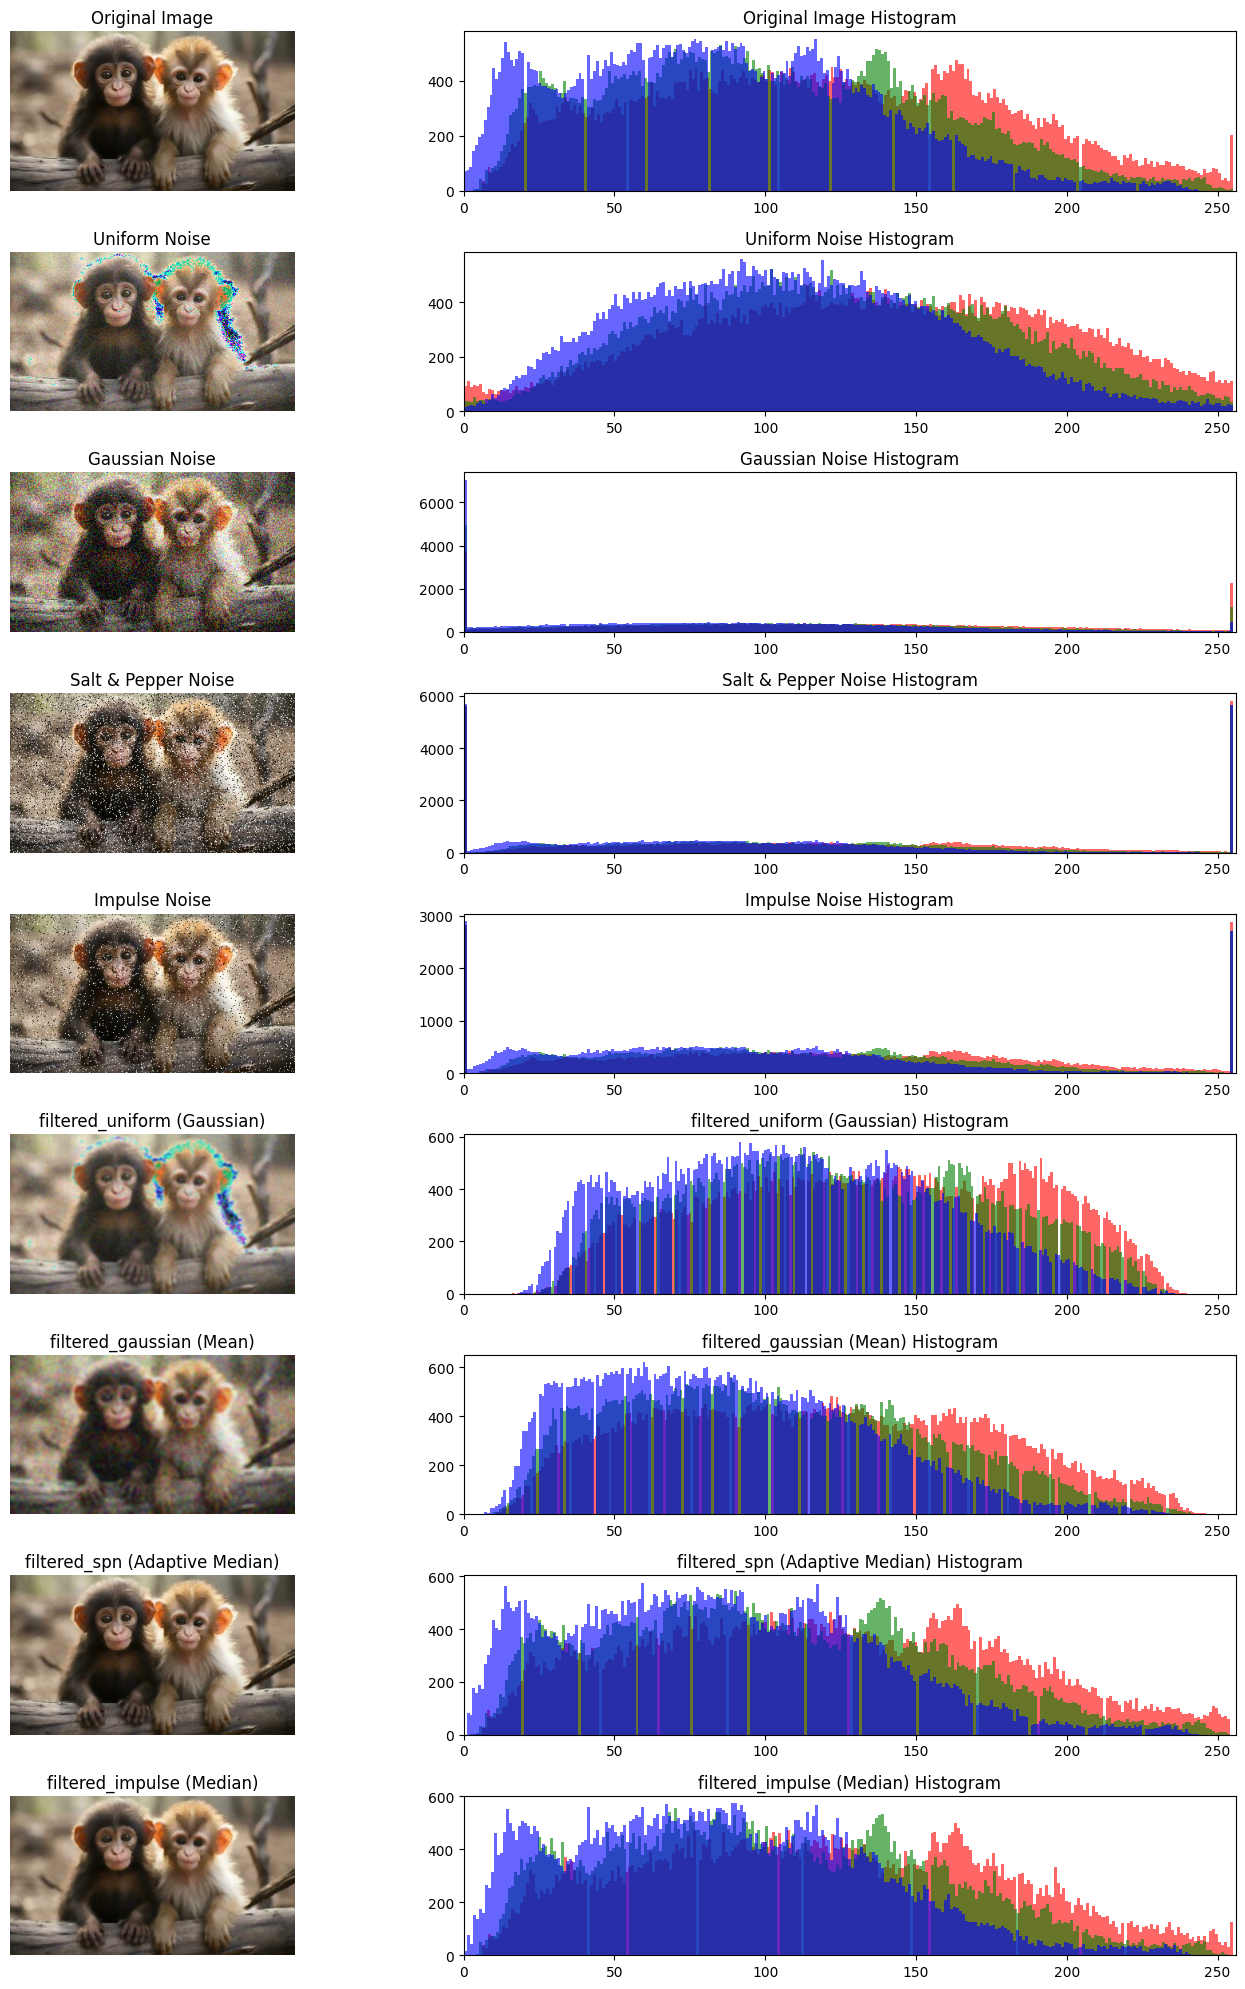

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image
image = cv2.imread("/content/monkey.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to add uniform noise
def add_uniform_noise(im):
    noise = np.random.uniform(0, 50, im.shape).astype(np.uint8)
    return np.clip(im + noise, 0, 255)

# Function to add Gaussian noise
def add_gaussian_noise(im, mean=0, sigma=45):
    gaussian_noise = np.random.normal(mean, sigma, im.shape)
    return np.uint8(np.clip(im + gaussian_noise, 0, 255))

# Function to add impulse noise
def add_impulse_noise(im):
    im_copy = np.copy(im)
    r, c, _ = im.shape
    n = np.random.randint(200, 3000)
    for _ in range(n):
        xc, yc = np.random.randint(0, r), np.random.randint(0, c)
        im_copy[xc, yc] = [255, 255, 255]  # White pixel
    for _ in range(n):
        xc, yc = np.random.randint(0, r), np.random.randint(0, c)
        im_copy[xc, yc] = [0, 0, 0]  # Black pixel
    return im_copy

# Function to add salt & pepper noise
def add_salt_pepper_noise(im, prob=0.08):
    output = np.copy(im)
    thres = 1 - prob
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i, j] = [0, 0, 0]  # Black pixel (pepper)
            elif rdn > thres:
                output[i, j] = [255, 255, 255]  # White pixel (salt)
    return output

# Apply noise to images
noisy_img_uniform = add_uniform_noise(image)
noisy_img_gaussian = add_gaussian_noise(image)
noisy_img_spn = add_salt_pepper_noise(image)
noisy_img_impulse = add_impulse_noise(image)

# Filters to remove noise
def apply_gaussian_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def apply_mean_filter(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))

def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

# Adaptive Median Filter for Salt & Pepper Noise
def adaptive_median_filter(image, max_kernel_size=7):
    padded_img = cv2.copyMakeBorder(image, max_kernel_size//2, max_kernel_size//2, max_kernel_size//2, max_kernel_size//2, cv2.BORDER_REFLECT)
    filtered_img = np.copy(image)

    rows, cols, channels = image.shape
    for i in range(rows):
        for j in range(cols):
            for ch in range(channels):
                kernel_size = 3  # Start with 3x3 kernel
                while kernel_size <= max_kernel_size:
                    r1, r2 = i + max_kernel_size//2 - kernel_size//2, i + max_kernel_size//2 + kernel_size//2
                    c1, c2 = j + max_kernel_size//2 - kernel_size//2, j + max_kernel_size//2 + kernel_size//2
                    region = padded_img[r1:r2+1, c1:c2+1, ch]

                    med_val = np.median(region)
                    min_val = np.min(region)
                    max_val = np.max(region)

                    if min_val < med_val < max_val:
                        if min_val < image[i, j, ch] < max_val:
                            filtered_img[i, j, ch] = image[i, j, ch]
                        else:
                            filtered_img[i, j, ch] = med_val
                        break
                    else:
                        kernel_size += 2  # Increase kernel size if needed

    return filtered_img

# Apply filters to denoise images
filtered_uniform = apply_gaussian_filter(noisy_img_uniform)  # Best for uniform noise
filtered_gaussian = apply_mean_filter(noisy_img_gaussian)    # Best for Gaussian noise
filtered_spn = adaptive_median_filter(noisy_img_spn)         # Adaptive median filter for Salt & Pepper noise
filtered_impulse = apply_median_filter(noisy_img_impulse)    # Best for Impulse noise

# Function to plot histogram for an image
def plot_histogram(image, title):
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        plt.hist(image[:, :, i].ravel(), bins=256, color=color, alpha=0.6)
    plt.title(title + " Histogram")
    plt.xlim(0, 256)

# Display images and histograms
plt.figure(figsize=(15, 20))

titles = [
    "Original Image", "Uniform Noise", "Gaussian Noise", "Salt & Pepper Noise", "Impulse Noise",
    "filtered_uniform (Gaussian)", "filtered_gaussian (Mean)", "filtered_spn (Adaptive Median)", "filtered_impulse (Median)"
]
images = [
    image, noisy_img_uniform, noisy_img_gaussian, noisy_img_spn, noisy_img_impulse,
    filtered_uniform, filtered_gaussian, filtered_spn, filtered_impulse
]

# Plot images
for i in range(9):
    plt.subplot(9, 2, 2 * i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

    plt.subplot(9, 2, 2 * i + 2)
    plot_histogram(images[i], titles[i])

plt.tight_layout()
plt.show()


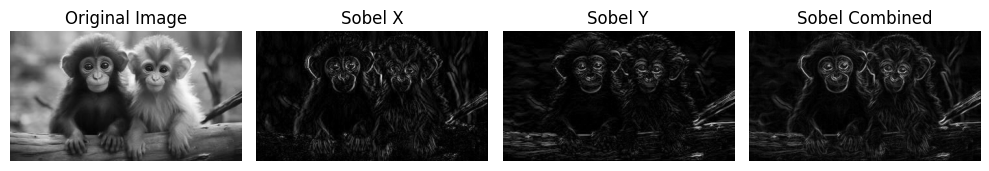

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("/content/monkey.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Sobel filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=1)  # Detect edges in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=1)  # Detect edges in Y direction

# Convert absolute values for proper visualization
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine both directional edges
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Combined")
plt.axis("off")

plt.tight_layout()
plt.show()


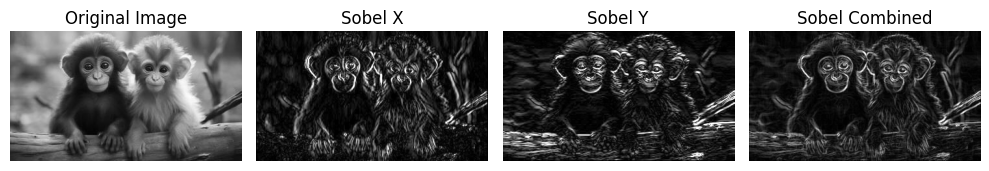

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("/content/monkey.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Sobel filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Detect edges in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Detect edges in Y direction

# Convert absolute values for proper visualization
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine both directional edges
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Combined")
plt.axis("off")

plt.tight_layout()
plt.show()


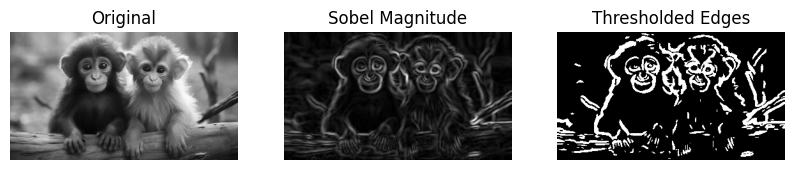

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image = cv2.imread("/content/monkey.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise (optional but improves accuracy)
image_blur = cv2.GaussianBlur(image, (5, 5), 0)  # Larger kernel smooths noise

# Sobel edge detection with a larger kernel (5x5 for more accurate edges)
sobel_x = cv2.Sobel(image_blur, cv2.CV_64F, 1, 0, ksize=5)  # Detects vertical edges
sobel_y = cv2.Sobel(image_blur, cv2.CV_64F, 0, 1, ksize=5)  # Detects horizontal edges

# Compute the magnitude of gradients to combine X and Y directions
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalize the magnitude image for display
sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude))

# Apply a binary threshold to highlight strong edges
_, sobel_thresh = cv2.threshold(sobel_magnitude, 50, 255, cv2.THRESH_BINARY)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(sobel_magnitude, cmap='gray'), plt.title('Sobel Magnitude')
plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(sobel_thresh, cmap='gray'), plt.title('Thresholded Edges')
plt.axis('off')
plt.show()
